#Image Negative

In [23]:
from matplotlib import pyplot as plt
import cv2
import PIL
import numpy as np
from skimage import io

In [2]:
img = cv2.imread("test1.png")

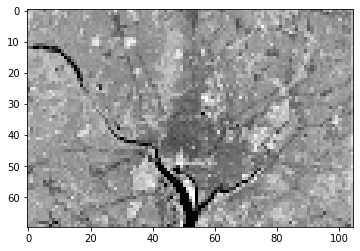

In [3]:
plt.imshow(img)

In [4]:
img_negative = 255 - img

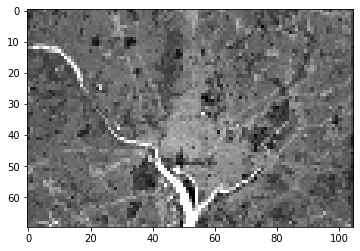

In [5]:
plt.imshow(img_negative)

In [6]:
img_neg_lib = cv2.bitwise_not(img)

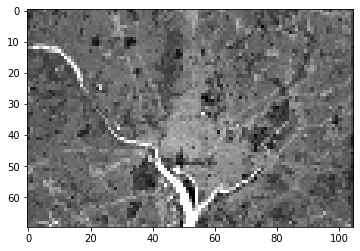

In [7]:
plt.imshow(img_neg_lib)

#Thresholding

146


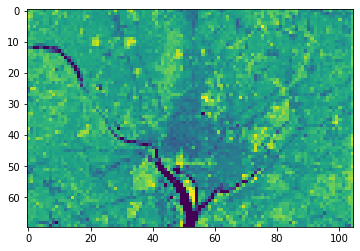

In [39]:
img_gray = cv2.imread("test1.png",cv2.IMREAD_GRAYSCALE)
row,col = img_gray.shape[0],img_gray.shape[1]
thresh_img_1 = img_gray
count = 0
values = 0
for i in range(row):
  for j in range(col):
    count+=1
    values+=thresh_img_1[i][j]

avg = values//count
print(avg)
for i in range(row):
  for j in range(col):
      thresh_img_1[i][j]-avg
plt.imshow(thresh_img_1)

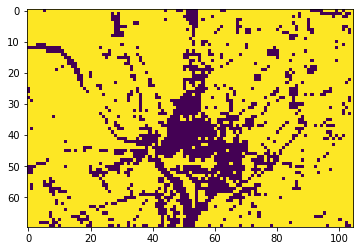

In [36]:
thresh_img_2 = img_gray
for i in range(row):
  for j in range(col):
    if thresh_img_2[i][j]<127:
      thresh_img_2[i][j]=0
    else:
      thresh_img_2[i][j]=255
plt.imshow(thresh_img_2)

#Image Contrast

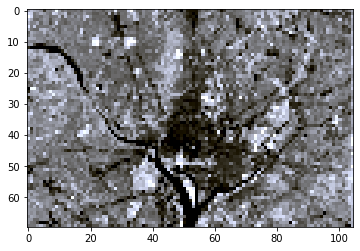

In [17]:
# function to process the red band of the image
def normalize_Red(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# function to process the green band of the image
def normalize_Green(intensity):
    iI      = intensity 
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO
# function to process the blue band of the image
def normalize_Blue(intensity):
    iI      = intensity 
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Create an image object
imageObject     = PIL.Image.open("test1.png")
# Split the red, green and blue bands from the Image
multiBands      = imageObject.split()
# Apply point operations that does contrast stretching on each color band
normalized_Red_Band      = multiBands[0].point(normalize_Red)
normalized_Green_Band    = multiBands[1].point(normalize_Green)
normalized_Blue_Band     = multiBands[2].point(normalize_Blue)

# Create a new image from the contrast stretched red, green and blue brands
normalized_Image = PIL.Image.merge("RGB", (normalized_Red_Band, normalized_Green_Band, normalized_Blue_Band))
plt.imshow(normalized_Image)

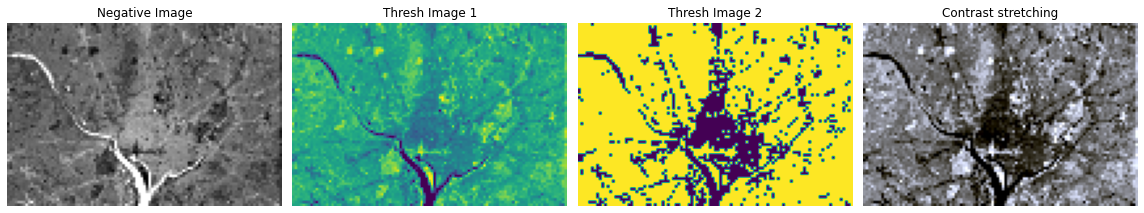

In [40]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()

ax1.imshow(img_negative)
ax1.set_title('Negative Image')
ax2.imshow(thresh_img_1)
ax2.set_title('Thresh Image 1')
ax3.imshow(thresh_img_2)
ax3.set_title('Thresh Image 2')
ax4.imshow(normalized_Image)
ax4.set_title('Contrast stretching')

plt.tight_layout()
plt.show()